In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.random_test(9)

from dmrg_solver import DMRG_solver

chi = 32
opts_maxit = 2
opts_krydim = 4
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi, opts_maxit, opts_krydim)

penalty = 100
numsweeps = 100
qkp_DMRG.show_run_plots = False
error = qkp_DMRG.annealing_run(penalty, step=10, numsweeps = numsweeps, normalization=False)
print('Final error: ', error)

EEEEEEEEY 46340.95022937998
EEEEEEEEY -24616.288586058618
EEEEEEEEY -10090.528056235551
EEEEEEEEY -3663.2271937888654
EEEEEEEEY -1103.7571299563697
EEEEEEEEY -249.19619399695605
EEEEEEEEY 38.595635918054896
EEEEEEEEY 3.600775665195674
EEEEEEEEY -0.13843872103616836
EEEEEEEEY 0.0016211824194179727
EEEEEEEEY -1.420418261781999e-08
Final error:  (1.2764770480673054e-18+0j)


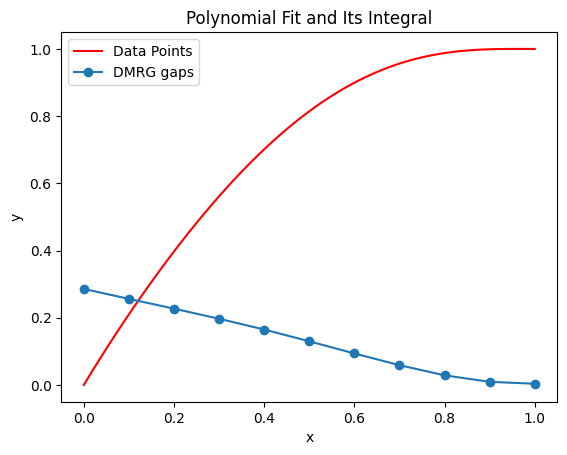

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

s = qkp_DMRG.annealing_time_estimation()

# Create a sequence of 100 points for plotting the fitted polynomial and its integral
x = np.linspace(0, 1, num = 100)
y = s(x)
# Plot the data points, fitted polynomial, and its integral
plt.plot(x, y, color='red', label='Data Points')
x_gaps = [(s / (len(qkp_DMRG.dmrg_gaps)-1)) for s in range(len(qkp_DMRG.dmrg_gaps))]
plt.plot(x_gaps, qkp_DMRG.dmrg_gaps, label='DMRG gaps', marker='o')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit and Its Integral')
plt.show()

[Qibo 0.2.7|INFO|2024-06-01 21:28:41]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-06-01 21:28:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-06-01 21:28:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [0, 5]
Target energy -2.0522540606675594
+ offset (4381.673) = 4379.620745939333


[Qibo 0.2.7|WARNING|2024-06-01 21:29:27]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


final annealing energy:  -1.9250313976294289
-------- Solution has items:  [3, 5] --------
 - Evaluating candidate  [3, 5]
Profit: 153
Weight: 52 (satisfies constraint W=77)
Energy: -157.10000000000002
-------------------------------------------------
Target energy -2.0522540606675594
+ offset (4381.673) = 4379.620745939333
final annealing energy:  -1.7139950512825843
-------- Solution has items:  [3, 5] --------
 - Evaluating candidate  [3, 5]
Profit: 153
Weight: 52 (satisfies constraint W=77)
Energy: -157.10000000000002
-------------------------------------------------


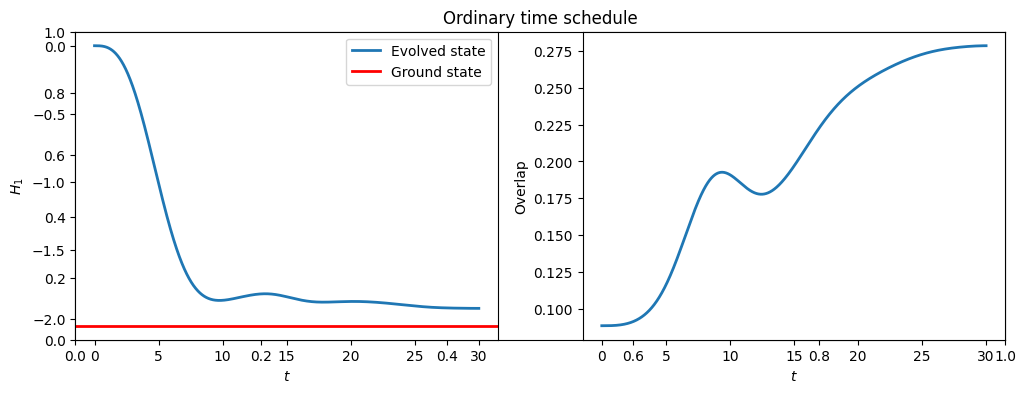

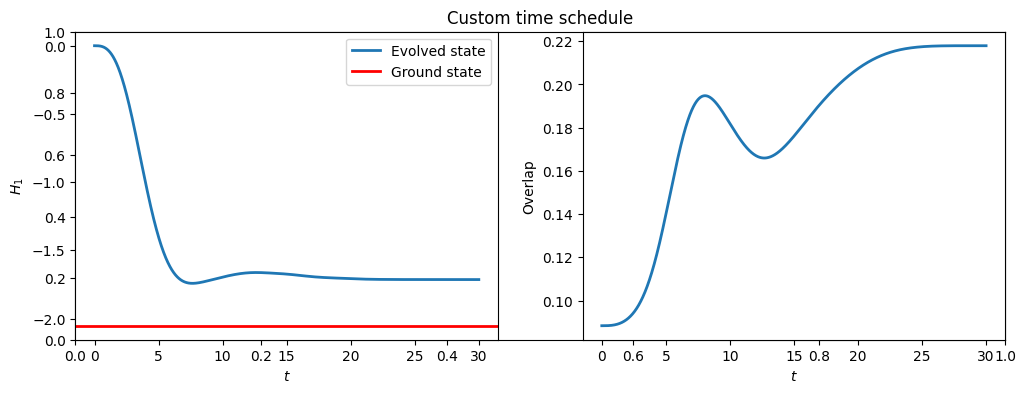

In [ ]:
from qibo_solver import Qibo_annealing_solver

Qibo_solver = Qibo_annealing_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
h1 = Qibo_solver.get_ham()

T = 30 # Total time of the adiabatic evolution.
Qibo_solver.run(T)
Qibo_solver.show_solution()


# WITH SCHEDULING
Qibo_solver.set_annealing_schedule(s)
Qibo_solver.run(T)
Qibo_solver.show_solution()